In [386]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.stats as sp_stat #Génération des données selon une loi de Poisson
import scipy.special as sp_spe #Cacul de la fonction de répartition
import scipy.interpolate as sp_interp #Interpolation des données

In [387]:
#Génération des données selon une loi de Poisson
mu_ni=5
nbr=100
ni=sp_stat.poisson.rvs(mu=mu_ni,size=nbr)
#ni=sp_stat.norm.rvs(loc=mu_ni,size=nbr)
p_ni,bin_ni=np.histogram(ni,bins=15)
left,right = bin_ni[:-1],bin_ni[1:]
x_pni = np.array([left,right]).T.flatten()
y_pni = np.array([p_ni,p_ni]).T.flatten()
p_poisson=[sp_stat.poisson.pmf(k,mu=mu_ni) for k in range(15)]

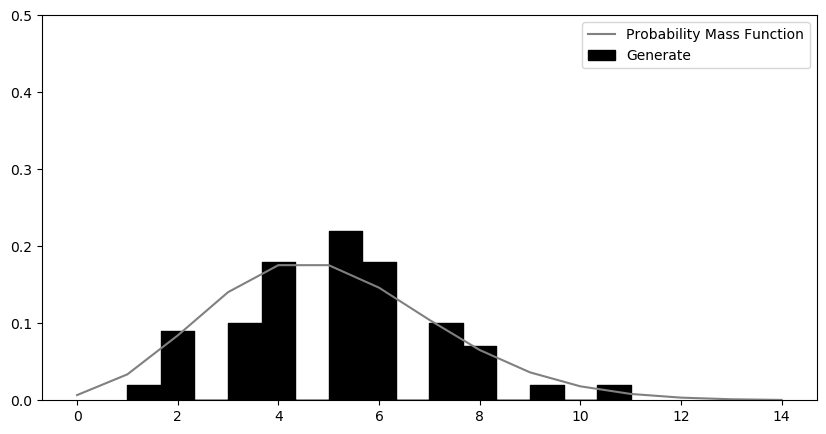

In [388]:
#Comparaison de la distribution des données générées par rapport à une vrai distribution poissonnienne
fig,ax=plt.subplots(figsize=(10,5))
ax.fill_between(x_pni,y_pni/nbr,color="black",label="Generate")
ax.plot(range(15),p_poisson,color="grey",label="Probability Mass Function")
ax.set_ylim(0,0.5)
plt.legend()
plt.show()

In [389]:
#Calcul des fonctions de distribution cumulative
P_ni=np.cumsum(p_ni/nbr)
P_poisson=[sp_stat.poisson.cdf(k,mu=mu_ni) for k in range(15)]

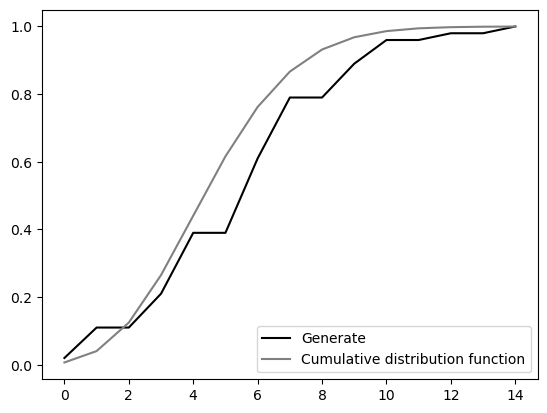

In [390]:
#Comparaison des fonction de distribution cumulative
fig,ax=plt.subplots()
ax.plot(P_ni,color="black",label="Generate")
ax.plot(P_poisson,color="grey",label="Cumulative distribution function")
plt.legend()
plt.show()

In [391]:
#Créatiion de la fonction d'interpolation
interp_ni=sp_interp.interp1d(range(15),P_poisson,kind="linear")

In [392]:
#Application de l'interpolation au données générées
y_test=interp_ni(ni)
p_interp_ni,bin_interp_ni=np.histogram(y_test,bins=15)
left,right = bin_interp_ni[:-1],bin_interp_ni[1:]
x_p_interp_ni = np.array([left,right]).T.flatten()
y_p_interp_ni = np.array([p_interp_ni,p_interp_ni]).T.flatten()

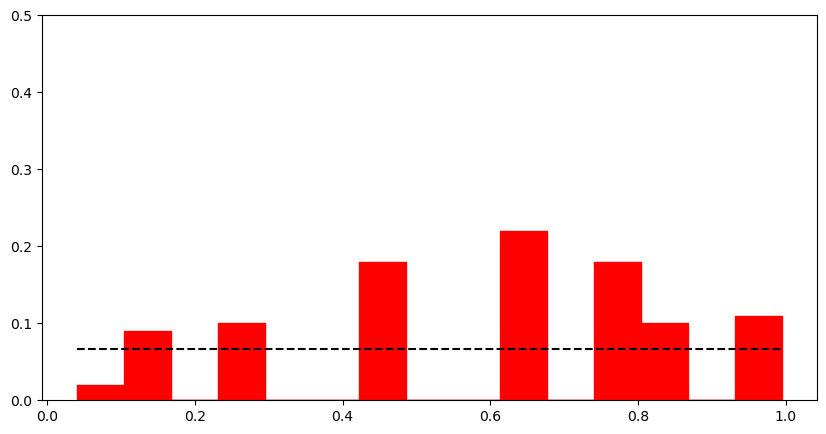

In [393]:
#Représentation après l'interpolation
fig,ax=plt.subplots(figsize=(10,5))
ax.fill_between(x_p_interp_ni,y_p_interp_ni/nbr,color="red")
ax.hlines(1/15,x_p_interp_ni.min(),x_p_interp_ni.max(),linestyle='dashed')
ax.set_ylim(0,0.5)
plt.show()
